# Ejercicio 1 - Heladería

Se quiere calcular la catidad de clientes que tendrá una heladería dependiendo de la temperatura exterior.

- Si la temperatura es <b>alta</b> entonces la heladería estará <b>llena</b>
- Si la temperatura es <b>moderada</b> entonces la heladería estará <b>ocupada</b>
- Si la temperatura es <b>baja</b> entonces la heladería estará <b>tranquila</b>

El número máximo de clientes para el local es de 35 clientes.
Definir los rangos de pertenencias para los antecedentes y consecuentes.

In [1]:
%matplotlib inline
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib
import matplotlib.pyplot as plt

## Antecendentes

Definir y graficar los antecedentes para el problema.

C:\Users\Lautaro Gimenez\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


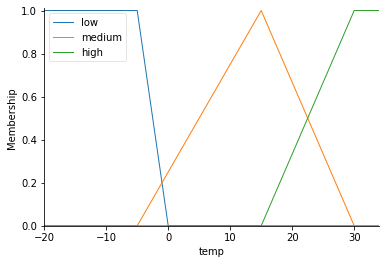

In [3]:
temp = ctrl.Antecedent(np.arange(-20,35,1), "temp")
temp["low"] = fuzz.trapmf(temp.universe, [-20,-20,-5,0])
temp["medium"] = fuzz.trimf(temp.universe, [-5,15,30])
temp["high"] = fuzz.trapmf(temp.universe, [15,30,35,35])

temp.view()

## Consecuentes

Definir y gráficar los antecedentes para el problema.

C:\Users\Lautaro Gimenez\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


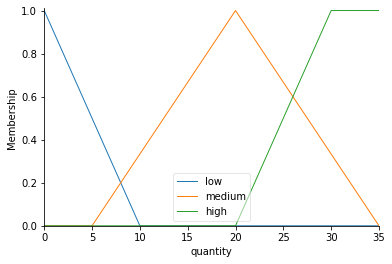

In [5]:
quantity = ctrl.Consequent(np.arange(0,36,1), 'quantity')
quantity["low"] = fuzz.trimf(quantity.universe, [0,0,10])
quantity["medium"] = fuzz.trimf(quantity.universe, [5,20,35])
quantity["high"] = fuzz.trapmf(quantity.universe, [20,30,35,35])
quantity.view()

## Reglas

Definir las reglas para el sistema.

In [7]:
quantity.deffuzify_method = "mom"
rules = []
rules.append(ctrl.Rule(temp["high"], quantity["high"]))
rules.append(ctrl.Rule(temp["medium"], quantity["medium"]))
rules.append(ctrl.Rule(temp["low"], quantity["low"]))

## Simulación

Simular y graficar la salida del sistema para las siguientes temperaturas.
 - -10º
 - 0º
 - 10º
 - 14º
 - 20º
 - 33 º

C:\Users\Lautaro Gimenez\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Lautaro Gimenez\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Lautaro Gimenez\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Lautaro Gimenez\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Lautaro Gimenez\ana

cantidad: 20.0
cantidad: 20.0
cantidad: 20.0
cantidad: 20.000000000000004
cantidad: 20.784313725490193


C:\Users\Lautaro Gimenez\anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


cantidad: 29.583333333333332


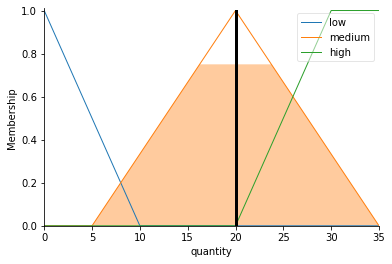

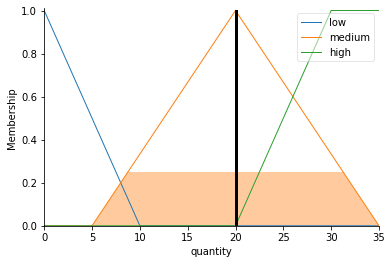

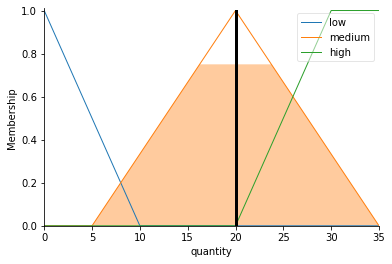

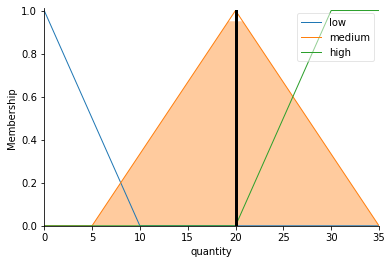

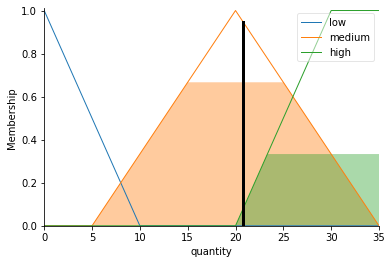

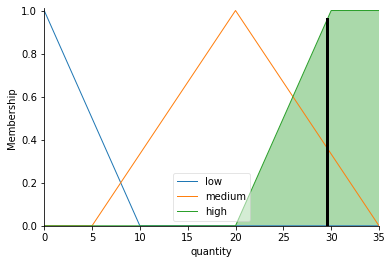

In [9]:
ctrSys = ctrl.ControlSystem(rules)
customers = ctrl.ControlSystemSimulation(ctrSys)
values = [10,0,10,14,20,33]
for val in values:
    customers.input["temp"] = val
    customers.compute()
    quantity.view(sim=customers)
    print(f"cantidad: {customers.output['quantity']}")